In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data -= mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
train_data /= std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data -= mean
test_data /= std

In [15]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.

from tensorflow.keras import models, layers

# 모델 구성
model = models.Sequential()
model.add(layers.Dense(units=52, activation='relu', input_shape=(train_data.shape[1], )))
model.add(layers.Dense(39, activation='relu'))
model.add(layers.Dense(26, activation='relu'))
model.add(layers.Dense(1, activation='relu'))

model.compile(optimizer='adam', loss='mse', metrics = 'mae')

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 52)                728       
_________________________________________________________________
dense_9 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_10 (Dense)             (None, 26)                1040      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


In [16]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(train_data, train_labels,
                    epochs=60,
                    batch_size=32,
                    validation_split=0.25)

Epoch 1/60
10/10 [==============================] - 1s 18ms/step - loss: 534.0325 - mae: 21.3328 - val_loss: 651.9920 - val_mae: 23.4857
Epoch 2/60
10/10 [==============================] - 0s 5ms/step - loss: 503.3275 - mae: 20.5818 - val_loss: 614.1295 - val_mae: 22.6891
Epoch 3/60
10/10 [==============================] - 0s 4ms/step - loss: 464.8878 - mae: 19.6108 - val_loss: 561.5685 - val_mae: 21.5158
Epoch 4/60
10/10 [==============================] - 0s 4ms/step - loss: 408.9326 - mae: 18.1087 - val_loss: 477.1931 - val_mae: 19.5675
Epoch 5/60
10/10 [==============================] - 0s 4ms/step - loss: 325.4118 - mae: 15.7647 - val_loss: 356.5255 - val_mae: 16.4908
Epoch 6/60
10/10 [==============================] - 0s 4ms/step - loss: 219.8623 - mae: 12.6489 - val_loss: 216.5384 - val_mae: 12.4215
Epoch 7/60
10/10 [==============================] - 0s 4ms/step - loss: 115.7297 - mae: 8.8890 - val_loss: 107.1776 - val_mae: 8.2382
Epoch 8/60
10/10 [==============================]

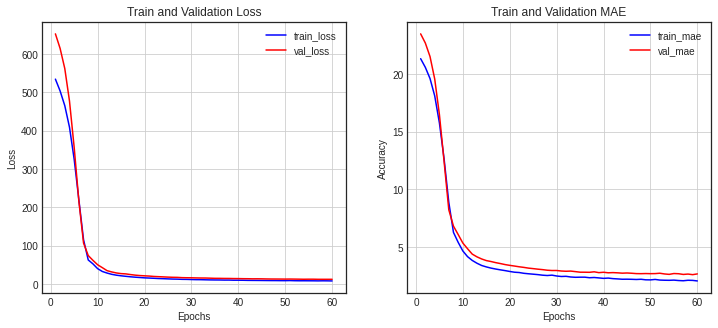

In [17]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [19]:
# 모델 평가 및 예측
# 모델이 학습한 결과를 평가하기 위해서는 테스트 데이터셋인 x_test와 y_test를 지정하여 evaluate()를 실행시킵니다. 
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 24.4239 - mae: 3.2010


[24.42389488220215, 3.2009944915771484]